In [ ]:
%pip install networkx

In [1]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Nodes
job = "JOB_DS"
skills = ["DS", "SW", "COM"]
candidates = ["C1", "C2", "C3", "C4"]

# Add nodes
G.add_node(job, type="job")
for s in skills:
    G.add_node(s, type="skill")
for c in candidates:
    G.add_node(c, type="candidate")


In [2]:
job_skill_weights = {
    "DS": 0.5,
    "SW": 0.25,
    "COM": 0.25
}

for skill, w in job_skill_weights.items():
    G.add_edge(job, skill, weight=w)


In [3]:
candidate_skills = {
    "C1": {"DS": 0.85, "SW": 0.40, "COM": 0.40},
    "C2": {"DS": 0.70, "SW": 0.70, "COM": 0.70},
    "C3": {"DS": 0.90, "SW": 0.10, "COM": 0.90},
    "C4": {"DS": 0.65, "SW": 0.85, "COM": 0.60},
}

for c, skills_dict in candidate_skills.items():
    for s, w in skills_dict.items():
        G.add_edge(s, c, weight=w)


In [6]:
personalization = {n: 0 for n in G.nodes()}
personalization[job] = 1.0

scores = nx.pagerank(
    G,
    alpha=0.85,
    personalization=personalization,
    weight="weight"
)


In [7]:
candidate_scores = {
    c: scores[c] for c in candidates
}

ranking = sorted(candidate_scores.items(), key=lambda x: x[1], reverse=True)

for c, score in ranking:
    print(c, round(score, 4))


C4 0.0748
C2 0.0746
C3 0.0685
C1 0.063


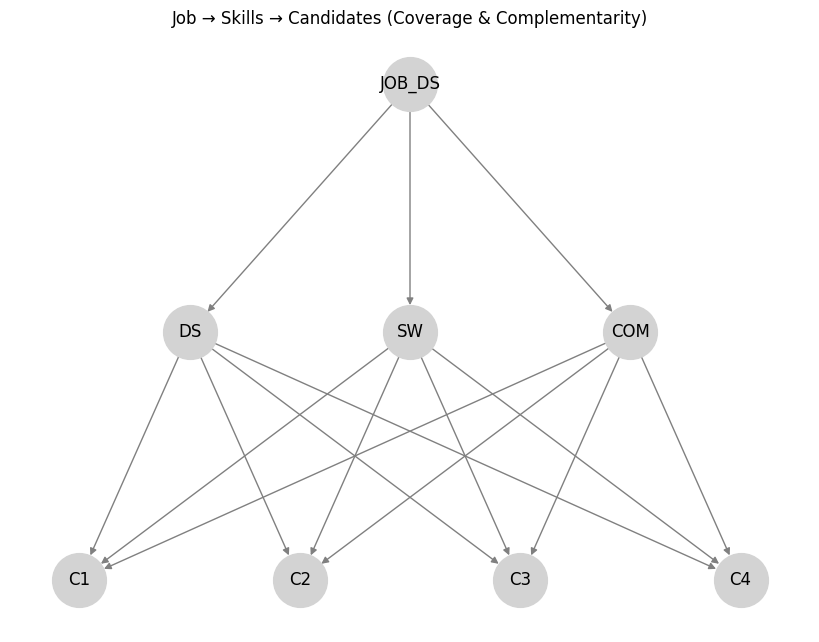

In [12]:
import matplotlib.pyplot as plt
import networkx as nx

pos = {
    "JOB_DS": (0, 2),
    "DS": (-1, 1),
    "SW": (0, 1),
    "COM": (1, 1),
    "C1": (-1.5, 0),
    "C2": (-0.5, 0),
    "C3": (0.5, 0),
    "C4": (1.5, 0),
}

plt.figure(figsize=(8, 6))

nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=1500,
    node_color="lightgray",
    edge_color="gray"
)

plt.title("Job → Skills → Candidates (Coverage & Complementarity)")
plt.show()
